In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

plt.rcParams.update({"font.size":14, "font.family":"serif"})

#### Спектры, снятые с одномодовым оптоволокном

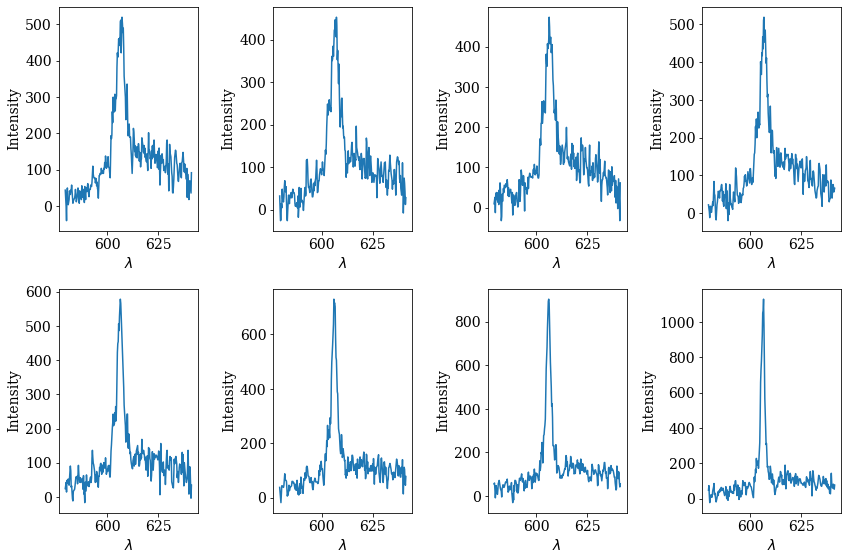

In [179]:
a, b = 500, 800


plt.figure(figsize=(12, 8))
for i in range(1, 9):
    data = pd.read_csv("data/{}.esp".format(i), skiprows=2, sep=" ")
    x, y = np.array(data.iloc[:,0]), np.array(data.iloc[:,1])
    
    plt.subplot(2, 4, i)
    plt.plot(x[a:b], y[a:b])
    plt.xlabel("$\\lambda$")
    plt.ylabel("Intensity")
    
    
plt.tight_layout()
plt.savefig("Singlemode.pdf")

- При понижении температуры из-за сужения линии растет интенсивность


- В этой серии измерений не разрешается два контура, что связано с плохой контрастностью измерений из-за работы с одномодовым волокном

#### Спектры, снятые с многомодовым оптоволокном 

In [75]:
def lorenz2(x, g1, g2, c1, c2, a1, a2):
    return a1*(g1/2)**2/((x-c1)**2 + (g1/2)**2) + a2*(g2/2)**2/((x-c2)**2 + (g2/2)**2)

def lorenz(x, g1, c1, a1):
    return a1*(g1/2)**2/((x-c1)**2 + (g1/2)**2)

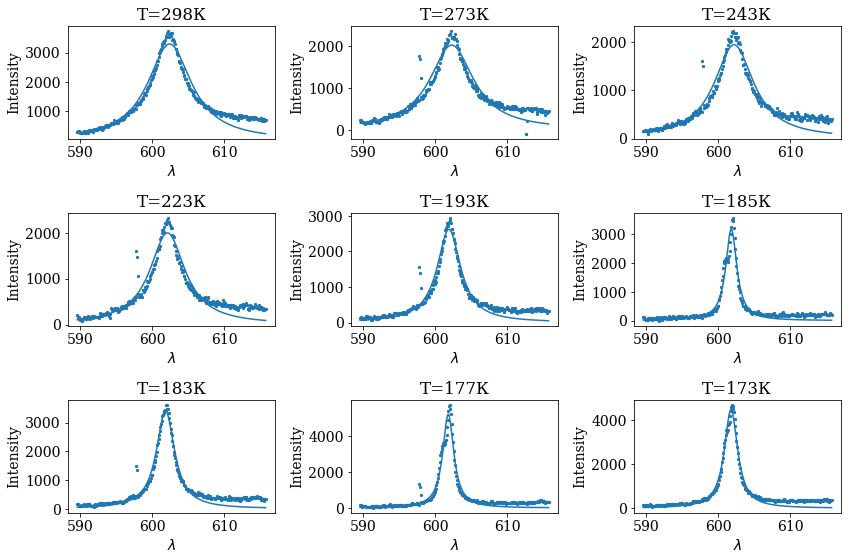

In [181]:
T = [25, 0, -30, -50, -80, -88, -90, -96, -100]

a, b = 2000, 2300

G, C, A = [], [], []
P = []

plt.figure(figsize=(12, 8))

for t, i in zip(T, range(1, 10)):
    data = pd.read_csv("data/{}.esp".format(t), skiprows=2, sep=" ")
    x, y = np.array(data.iloc[:,0]), np.array(data.iloc[:,1])

    xt, yt = [], []
#     for j in range(1, x.shape[0]):
#         if abs(y[j]-y[j-1]) > 500:
#             pass
#         else:
#             xt.append(x[j])
#             yt.append(y[j])
    xt, yt = x, y
            
    popt, pcov = curve_fit(lorenz, xt[a:b], yt[a:b], p0=[1, 600, 3000])
    peaks, vals = find_peaks(yt[a:b], distance=100, height=2000)
    P.append((peaks, vals))
    
    g, c, am = popt
    G.append(g)
    C.append(xt[a:b][np.argmax(yt[a:b])])
    A.append(am)
    
    plt.subplot(3, 3, i)
    plt.scatter(xt[a:b], yt[a:b], s=5)
    plt.plot(xt[a:b], lorenz(xt[a:b], *popt))
    plt.xlabel("$\\lambda$")
    plt.ylabel("Intensity")
    plt.title("T={}К".format(273+t))
    
plt.tight_layout()

plt.savefig("Multimode.pdf")

0.09136980661800229
0.042360815800731304
0.9697494391581979 1.2381383411139304
1346.9031770451597 3245.3992106428645


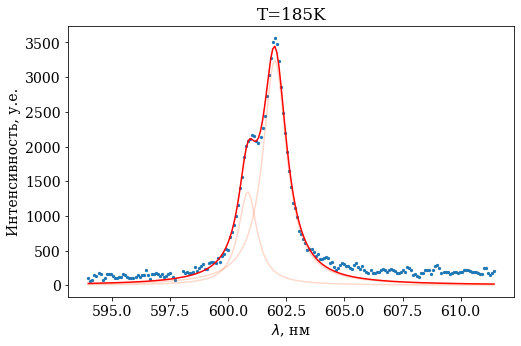

In [186]:
data = pd.read_csv("data/{}.esp".format(185-273), skiprows=2, sep=" ")
x, y = np.array(data.iloc[:,0]), np.array(data.iloc[:,1])

x, y = x[a:b], y[a:b]

a, b = 2050, 2250


plt.figure(figsize=(8, 5))
idx = [43, 44, 45]
x, y = np.delete(x, idx), np.delete(y, idx)

plt.scatter(x, y, s=5)

popt, pcov = curve_fit(lorenz2, x, y, p0=[1, 1, 600, 602, 3000, 5000])
g1, g2, c1, c2, a1, a2 = popt

plt.plot(x, lorenz2(x, *popt), color="red")
plt.plot(x, lorenz(x, g1, c1, a1), color="orangered", alpha=0.2)
plt.plot(x, lorenz(x, g2, c2, a2), color="orangered", alpha=0.2)

plt.title("T={}K".format(185))
plt.xlabel("$\\lambda$, нм")
plt.ylabel("Интенсивность, у.е.")

print(pcov[0,0]**0.5)
print(pcov[1,1]**0.5)

print(g1, g2)
print(a1, a2)

plt.savefig("185.pdf")

0.0915842620280807
0.039405089440424076
1.070161338252982 1.2666538747207858
2078.4847827307717 5173.341263916012


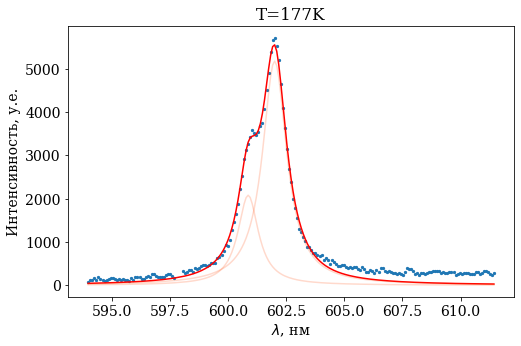

In [187]:
data = pd.read_csv("data/{}.esp".format(-96), skiprows=2, sep=" ")
x, y = np.array(data.iloc[:,0]), np.array(data.iloc[:,1])

x, y = x[a:b], y[a:b]

a, b = 2050, 2250


plt.figure(figsize=(8, 5))
idx = [43, 44, 45]
x, y = np.delete(x, idx), np.delete(y, idx)

plt.scatter(x, y, s=5)

popt, pcov = curve_fit(lorenz2, x, y, p0=[1, 1, 600, 602, 3000, 5000])
g1, g2, c1, c2, a1, a2 = popt

plt.plot(x, lorenz2(x, *popt), color="red")
plt.plot(x, lorenz(x, g1, c1, a1), color="orangered", alpha=0.2)
plt.plot(x, lorenz(x, g2, c2, a2), color="orangered", alpha=0.2)

plt.title("T={}K".format(273-96))
plt.xlabel("$\\lambda$, нм")
plt.ylabel("Интенсивность, у.е.")
print(pcov[0,0]**0.5)
print(pcov[1,1]**0.5)

print(g1, g2)
print(a1, a2)

plt.savefig("177.pdf")

In [168]:
c = 3e8

print((c/c1 - c/c2)*1e9 / 1e12)


0.9653486496705446


Text(0, 0.5, 'Intensity')

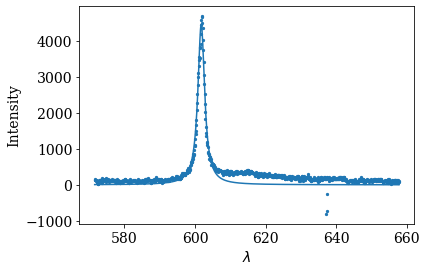

In [120]:
plt.scatter(xt[a:b], yt[a:b], s=5)
plt.plot(xt[a:b], lorenz(xt[a:b], *popt))
plt.xlabel("$\\lambda$")
plt.ylabel("Intensity")
# plt.title("T={}К".format(t))

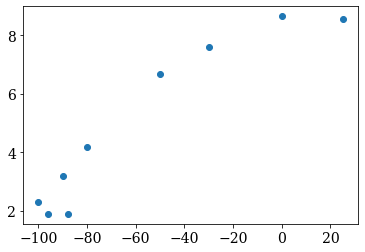

In [121]:
plt.scatter(T, G)
# plt.scatter(T, A)

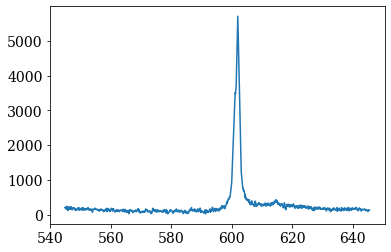

In [69]:
data = pd.read_csv("data/{}.esp".format(-96), skiprows=2, sep=" ")
x, y = np.array(data.iloc[:,0]), np.array(data.iloc[:,1])



    
plt.plot(xt[a:b], yt[a:b]

[(array([343]), {'peak_heights': array([3731.62020906])}),
 (array([343]), {'peak_heights': array([2357.34843206])}),
 (array([341]), {'peak_heights': array([2227.42508711])}),
 (array([343]), {'peak_heights': array([2325.57142857])}),
 (array([341]), {'peak_heights': array([2938.75609756])}),
 (array([341]), {'peak_heights': array([3565.34843206])}),
 (array([341]), {'peak_heights': array([3610.17073171])}),
 (array([341]), {'peak_heights': array([5707.95470383])}),
 (array([340]), {'peak_heights': array([4693.76655052])})]